In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
path = '../data/bikeshare/'
data_files = ['2017-q1_trip_history_data.csv', '2017-q2_trip_history_data.csv',
              '2017-q3_trip_history_data.csv', '2017-q4_trip_history_data.csv']

In [5]:
data_df_list = []
for file in data_files:
    full_path = os.path.join(path, file)
    data_df = pd.read_csv(full_path)
    data_df_list.append(data_df)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
all_df = pd.concat?

In [27]:
all_df = pd.concat(data_df_list, axis=0)

In [28]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3758207 entries, 0 to 815369
Data columns (total 9 columns):
Duration (ms)           int64
Start date              object
End date                object
Start station number    object
Start station           object
End station number      object
End station             object
Bike number             object
Member type             object
dtypes: int64(1), object(8)
memory usage: 286.7+ MB


In [29]:
all_df.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,221834,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member
1,1676854,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual
2,1356956,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual
3,1327901,2017-01-01 00:07:22,2017-01-01 00:29:30,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual
4,1636768,2017-01-01 00:07:36,2017-01-01 00:34:52,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual


In [30]:
member_type = all_df['Member type'].value_counts()

In [31]:
member_type.Member

2776393

In [32]:
member_type.Casual

981814

([<matplotlib.patches.Wedge at 0x16c6c9ac8>,
 [Text(-0.749859,0.804805,'Member'), Text(0.749859,-0.804805,'Casual')])

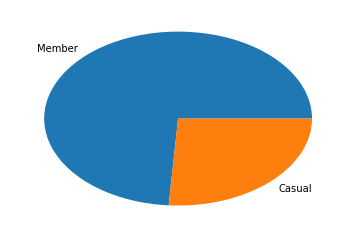

In [24]:
plt.figure()
plt.pie([member_type.Member, member_type.Casual],labels=['Member', 'Casual'])

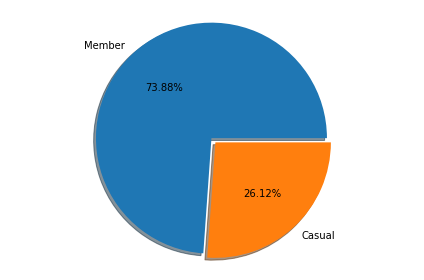

In [23]:
plt.figure()
plt.pie([member_type.Member, member_type.Casual], labels=['Member', 'Casual'], 
        autopct='%.2f%%', shadow=True, explode=(0.05, 0))
plt.axis('equal')
plt.tight_layout()
plt.show()

```python
# 数据源同上

"""
    明确任务：比较全年共享单车用户类别（会员、非会员）的比例
"""
import os
import numpy as np
import matplotlib.pyplot as plt

data_path = './data/bikeshare/'
data_filenames = ['2017-q1_trip_history_data.csv', '2017-q2_trip_history_data.csv',
                  '2017-q3_trip_history_data.csv', '2017-q4_trip_history_data.csv']

# 结果保存路径
output_path = './output'
if not os.path.exists(output_path):
    os.makedirs(output_path)


def collect_and_process_data():
    """
        Step 1+2: 数据获取，数据处理
    """
    member_type_list = []
    for data_filename in data_filenames:
        data_file = os.path.join(data_path, data_filename)
        data_arr = np.loadtxt(data_file, delimiter=',', dtype='str', skiprows=1)

        # 去掉双引号
        member_type_col = np.core.defchararray.replace(data_arr[:, -1], '"', '')
        member_type_col = member_type_col.reshape(-1, 1)

        member_type_list.append(member_type_col)

    year_member_type = np.concatenate(member_type_list)

    return year_member_type


def analyze_data(year_member_type):
    """
        Step 3: 数据分析
    """
    n_member = year_member_type[year_member_type == 'Member'].shape[0]
    n_casual = year_member_type[year_member_type == 'Casual'].shape[0]
    n_users = [n_member, n_casual]
    return n_users


def save_and_show_results(n_users):
    """
        Step 4: 结果展示
    """
    plt.figure()
    plt.pie(n_users, labels=['Member', 'Casual'], autopct='%.2f%%', shadow=True, explode=(0.05, 0))
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, './piechart.png'))
    plt.show()


def main():
    """
        主函数
    """
    year_member_type = collect_and_process_data()

    n_users = analyze_data(year_member_type)

    save_and_show_results(n_users)


if __name__ == '__main__':
    main()


```